# Exploratory Data Analysis
Using the clean dataset created in the `cleaning.ipynb`  notebook, I will be exploring the data to see if I can derive any meaningful insights into this dataset and the shape of the data. I will then be using that information to perform a meaningful statistical analysis, to determine answers to my questions. This will lead to final conclusions based on my findings.

## Intro

### The Data: 
The Dataset initially came from (Kaggle)[https://www.kaggle.com/datasets/smadler92/nfl-pfr], where the (user)[https://www.kaggle.com/smadler92] scraped the Data from the trusted and well known source of (Pro-Football-Reference)[https://www.pro-football-reference.com/]. 

The Data Initially came broken up into folders by team (32 folders), each containing multiple files. I joined the files of interest and cleaned the data, which can be seen in my previous [notebook](cleaning.ipynb).

I am also using the [weather csv](data/MFLML/weather.csv) that came with my data. (not yet actually)

### Question:
Based on the available game statistics, what is most influential game statistic towards winning the game, and scoring by the largest spread? Which Day of the week has the highest score or the largest spread in score?

### Hypothesis: 
I believe that teams that get the most amount of 1st down will have the best result when it comes to winning the game. I also believe the game day will not have a (significant) affect on score.

## Exploration

In [49]:
# Import Libraries
import pandas as pd # DataFrame manipulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
import statsmodels.api as sm #statistics - linear regression
from scipy.stats import ttest_1samp, ttest_ind # Stats testing

# Set up pandas environment
pd.set_option('display.max_columns', None) # all columns are shown
pd.options.display.float_format = '{:,.2f}'.format # all numbers to 2 decimals

# set up plotting environment
%matplotlib inline
sns.set_style("darkgrid")

###  Exploring the Scores DataFrame

In [2]:
# Load and check data
df = pd.read_csv('data/nfl_scores_clean.csv')
df.head()

GameID  Year Week  Day HomeTeam  HomeScore  AwayScore AwayTeam  \
0  197001NORATL  1970   01  Sun      NOR       3.00      14.00      ATL   
1  197001BUFDEN  1970   01  Sun      BUF      10.00      25.00      DEN   
2  197001NYGCHI  1970   01  Sat      NYG      16.00      24.00      CHI   
3  197001CINRAI  1970   01  Sun      CIN      31.00      21.00      RAI   
4  197001CLENYJ  1970   01  Mon      CLE      31.00      21.00      NYJ   

   Home1D  HomeTotYd  HomePassYd  HomeRushYd  HomeTO  Away1D  AwayTotYd  \
0    9.00     235.00      150.00       85.00    2.00   14.00     265.00   
1    8.00     149.00       56.00       93.00    4.00   11.00     282.00   
2   16.00     311.00      253.00       58.00    3.00   18.00     256.00   
3   14.00     364.00      117.00      247.00    1.00   13.00     291.00   
4   20.00     221.00      145.00       76.00     NaN   31.00     454.00   

   AwayPassYd  AwayRushYd  AwayTO  
0      116.00      149.00    2.00  
1      146.00      136.00    3.00  
2      158.00       98.00    3.00  
3      243.00       48.00    2.00  
4      286.00      168.00    4.00

In [3]:
# DataFrame information (dtypes and nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GameID      12261 non-null  object 
 1   Year        12261 non-null  int64  
 2   Week        12261 non-null  object 
 3   Day         12261 non-null  object 
 4   HomeTeam    12261 non-null  object 
 5   HomeScore   12261 non-null  float64
 6   AwayScore   12261 non-null  float64
 7   AwayTeam    12261 non-null  object 
 8   Home1D      12261 non-null  float64
 9   HomeTotYd   12261 non-null  float64
 10  HomePassYd  12259 non-null  float64
 11  HomeRushYd  12261 non-null  float64
 12  HomeTO      10066 non-null  float64
 13  Away1D      12261 non-null  float64
 14  AwayTotYd   12261 non-null  float64
 15  AwayPassYd  12255 non-null  float64
 16  AwayRushYd  12260 non-null  float64
 17  AwayTO      10255 non-null  float64
dtypes: float64(12), int64(1), object(5)
memory usage: 1.7+ MB


In [4]:
# Summary stats
df.describe()

Year  HomeScore  AwayScore    Home1D  HomeTotYd  HomePassYd  \
count 12,261.00  12,261.00  12,261.00 12,261.00  12,261.00   12,259.00   
mean   1,996.57      22.36      19.70     19.22     331.06      207.97   
std       14.45      10.44      10.15      4.99      85.15       79.65   
min    1,970.00       0.00       0.00      1.00      -7.00      -31.00   
25%    1,984.00      15.00      13.00     16.00     273.00      153.00   
50%    1,997.00      22.00      20.00     19.00     331.00      204.00   
75%    2,009.00      29.00      27.00     23.00     387.00      259.00   
max    2,020.00      62.00      62.00     40.00     661.00      522.00   

       HomeRushYd    HomeTO    Away1D  AwayTotYd  AwayPassYd  AwayRushYd  \
count   12,261.00 10,066.00 12,261.00  12,261.00   12,255.00   12,260.00   
mean       123.12      2.31     18.23     316.39      202.06      114.44   
std         53.93      1.35      5.02      86.48       79.75       52.19   
min         -3.00      1.00      2.00      26.00      -52.00      -18.00   
25%         84.00      1.00     15.00     257.00      146.00       77.00   
50%        116.00      2.00     18.00     316.00      198.00      107.00   
75%        156.00      3.00     22.00     375.00      254.00      145.00   
max        407.00     11.00     39.00     676.00      516.00      404.00   

         AwayTO  
count 10,255.00  
mean       2.38  
std        1.36  
min        1.00  
25%        1.00  
50%        2.00  
75%        3.00  
max       10.00

Looking quickly some things I have quickly noticed:
* Much of the data looks pretty normal (mean ~ median)
* The minimum tot yards for a home team was a loss of 7.0 yards (rough for that team, I wonder who it was and when?)
* Teams have had games with only 1 1st down

#### Adding Columns
There are some more stats that I would like to explore. This can be done by aggregating and maniuplating columns to receive some new or deeper insights.

Columns to add:
* `Spread` - The spread between the home and away team's score. This will be from the perspective of the home team (arbitrarily). 
* `HomeWin` - Whether or not the home team won. Determined by taking the sign of the `Spread`.
* `Total` - The total amount of points scored in the game between both the teams.
* `PassRushRatioTotal` - The ratio of the total passing yards vs the total rushing yards. This information should be more valuable then the absolute values, if determining that teams who pass/rush more are more successful.
* `HomePassRushRatio` - The ratio of the total passing yards vs the total rushing yards for the home team
* `AwayPassRushRatio` - The ratio of the total passing yards vs the total rushing yards for the away team
* `PassRushRatioDifference` - The difference in pass/rush ratio between home and away teams, from the perspective of the home team

Another useful column would be the spread of the home and away teams score. I will add a column that calculates this, from the perspective of the home team (ie: if the home team wins by 7, the value will be 7. If they lose by 7, the value will be -7)

In [5]:
# ADDING COLUMNS

# Determine score spread (from home team POV)
df['Spread'] = df['HomeScore'] - df['AwayScore']
# Add a column to determine if home team won or lost  (1 and 0 respectively)
df['HomeWin'] = df['Spread'].apply(lambda x: 1 if x>0 else 0)
# Find Total Score
df['Total'] = df['HomeScore'] + df['AwayScore']
# Pass/Rush Ratio Total Game
df['PassRushRatioTotal'] = (df['HomePassYd'] + df['AwayPassYd']) / (df['HomeRushYd'] + df['AwayRushYd']) # take combined pass from both teams, and divide by combined rush from both teams
# Pass/Rush Ratio for the Home Team
df['HomePassRushRatio'] = df['HomePassYd'] / df['HomeRushYd']
# Pass/Rush Ratio for the Away Team
df['AwayPassRushRatio'] = df['AwayPassYd'] / df['AwayRushYd']
# Difference in Pass/Rush Ration
df['PassRushRatioDifference'] = df['HomePassRushRatio'] - df['AwayPassRushRatio']

In [6]:
# Check df
df.sample(10)

GameID  Year Week  Day HomeTeam  HomeScore  AwayScore AwayTeam  \
2083   198006DENWAS  1980   06  Mon      DEN      20.00      17.00      WAS   
2995   198411GNBMIN  1984   11  Sun      GNB      45.00      17.00      MIN   
10553  201412CHITAM  2014   12  Sun      CHI      21.00      13.00      TAM   
10594  201414OTINYG  2014   14  Sun      OTI       7.00      36.00      NYG   
872    197409PHIWAS  1974   09  Sun      PHI      20.00      27.00      WAS   
7388   200214PITHTX  2002   14  Sun      PIT       6.00      24.00      HTX   
10002  201211ATLCRD  2012   11  Sun      ATL      23.00      19.00      CRD   
7994   200501SDGDAL  2005   01  Sun      SDG      24.00      28.00      DAL   
10484  201407CHIMIA  2014   07  Sun      CHI      14.00      27.00      MIA   
5163   1993DIOTIKAN  1993   DI  Sun      OTI      20.00      28.00      KAN   

       Home1D  HomeTotYd  HomePassYd  HomeRushYd  HomeTO  Away1D  AwayTotYd  \
2083    19.00     297.00      132.00      165.00    2.00   15.00     314.00   
2995    26.00     513.00      302.00      211.00    1.00   14.00     272.00   
10553   12.00     204.00      112.00       92.00    1.00   17.00     367.00   
10594   12.00     207.00      146.00       61.00    3.00   19.00     402.00   
872     23.00     267.00      183.00       84.00    3.00   15.00     271.00   
7388    24.00     422.00      294.00      128.00    5.00    3.00      47.00   
10002   20.00     354.00      296.00       58.00    6.00    7.00     178.00   
7994    19.00     291.00      188.00      103.00    2.00   23.00     301.00   
10484   14.00     224.00      172.00       52.00    3.00   24.00     393.00   
5163    19.00     277.00      238.00       39.00    3.00   18.00     354.00   

       AwayPassYd  AwayRushYd  AwayTO  Spread  HomeWin  Total  \
2083       130.00      184.00    1.00    3.00        1  37.00   
2995       162.00      110.00    2.00   28.00        1  62.00   
10553      301.00       66.00    4.00    8.00        1  34.00   
10594      260.00      142.00    1.00  -29.00        0  43.00   
872        225.00       46.00    1.00   -7.00        0  47.00   
7388        10.00       37.00    1.00  -18.00        0  30.00   
10002       41.00      137.00    1.00    4.00        1  42.00   
7994       192.00      109.00    1.00   -4.00        0  52.00   
10484      256.00      137.00     NaN  -13.00        0  41.00   
5163       283.00       71.00    2.00   -8.00        0  48.00   

       PassRushRatioTotal  HomePassRushRatio  AwayPassRushRatio  \
2083                 0.75               0.80               0.71   
2995                 1.45               1.43               1.47   
10553                2.61               1.22               4.56   
10594                2.00               2.39               1.83   
872                  3.14               2.18               4.89   
7388                 1.84               2.30               0.27   
10002                1.73               5.10               0.30   
7994                 1.79               1.83               1.76   
10484                2.26               3.31               1.87   
5163                 4.74               6.10               3.99   

       PassRushRatioDifference  
2083                      0.09  
2995                     -0.04  
10553                    -3.34  
10594                     0.56  
872                      -2.71  
7388                      2.03  
10002                     4.80  
7994                      0.06  
10484                     1.44  
5163                      2.12

#### Exploring with plots and stats
I am going to explore some of the more important statistics (especially in relation with answering my questions of 'what stat infuluence game spread the most? Does the wind affect the Total Points Scored?'

In [7]:
# Check the Distrubtion of spread
print(f"The mean of the spread is {df.Spread.mean()}")
print(f"The median of the spread is {df.Spread.median()}")
print(f"The mode of the spread is {df.Spread.mode()}")

The mean of the spread is 2.668134736155289
The median of the spread is 3.0
The mode of the spread is 0   3.00
Name: Spread, dtype: float64


Awesome, this data is looking like a normal distrubtion! It is also interesting that the averages here mean that the home team is winning more (or has the larger spread). We can further check this by plotting distribution:

<Figure size 1080x576 with 0 Axes>

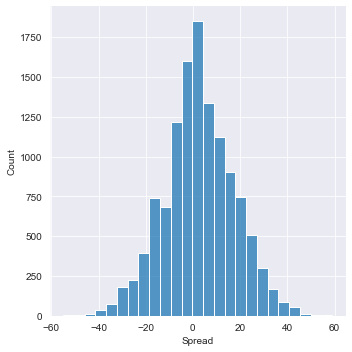

In [8]:
plt.figure(figsize=(15,8))
sns.displot(data=df, x='Spread', bins=25)

We can see in the above distrubiton, that the Spread looks 'mostly' normal. The interesting thing is that the spread is certainly aggregated around the mean/median! Lets quickly check the Standard Deviation as well:

In [9]:
# Standard Deviation
print(f"The Stanadard Deviation of the Spread is: {df.Spread.std()}")

The Stanadard Deviation of the Spread is: 14.75915023018747


I am happy with the distribution of the `Spread` and feel it will be reliable for further analysis. And is it true that the home team has won more games over the past 50 years?

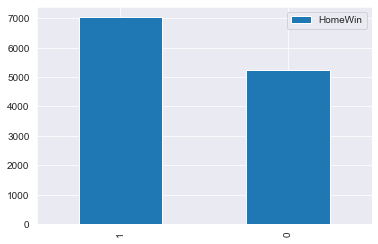

In [91]:
wins_df = df['HomeWin'].value_counts().to_frame().plot(kind='bar')

Yup! Just as expected the home team has more wins.

Let's continue by looking at the total score:

In [10]:
# Total Score
print(f"The mean of the spread is {df.Total.mean()}")
print(f"The median of the spread is {df.Total.median()}")
print(f"The mode of the spread is {df.Total.mode()}")

The mean of the spread is 42.05839654188076
The median of the spread is 41.0
The mode of the spread is 0   37.00
Name: Total, dtype: float64


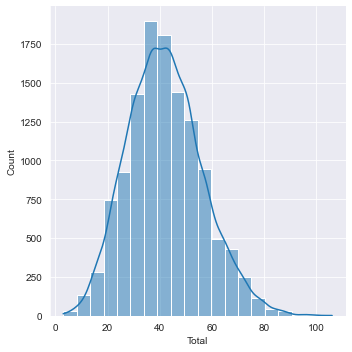

In [11]:
sns.displot(data=df, x='Total', bins=20, kde=True)

This column appears to be quite normal as well! It should be **NOTED** though that because of the nature of the column, the left side of the distribution is cut-off at 0, because there cannot be less than 0 points scored in a game.

I would now also like to explore how the total score may have changed over time. We'll be looking at the mean total score over the years:

<AxesSubplot:xlabel='Year', ylabel='Total'>

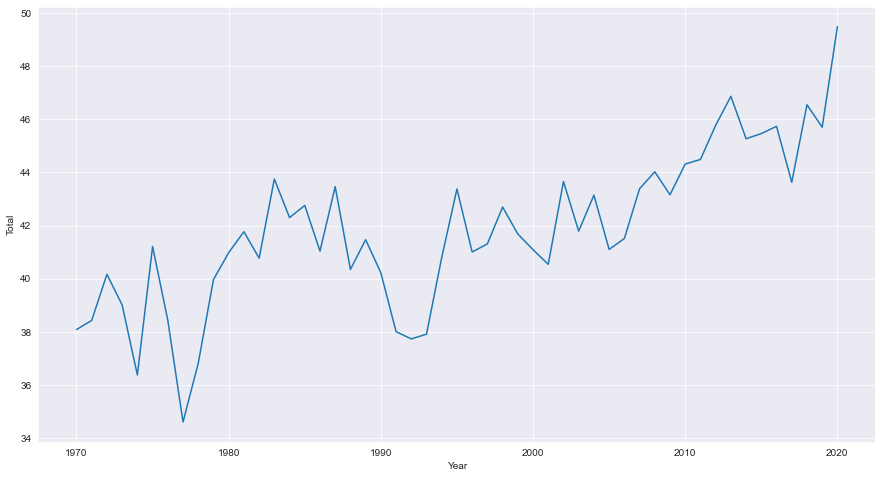

In [12]:
# Line plot for totalscore over the years
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='Year',y='Total', estimator='mean', ci=None)

Pretty interesting! It appears that over time, teams are on average scoring more (2020 being the highest scoring season in the last 50 years). I wonder if there has been a change in the passing vs rushing game that would have an influence on this?

<AxesSubplot:xlabel='Year', ylabel='PassRushRatioTotal'>

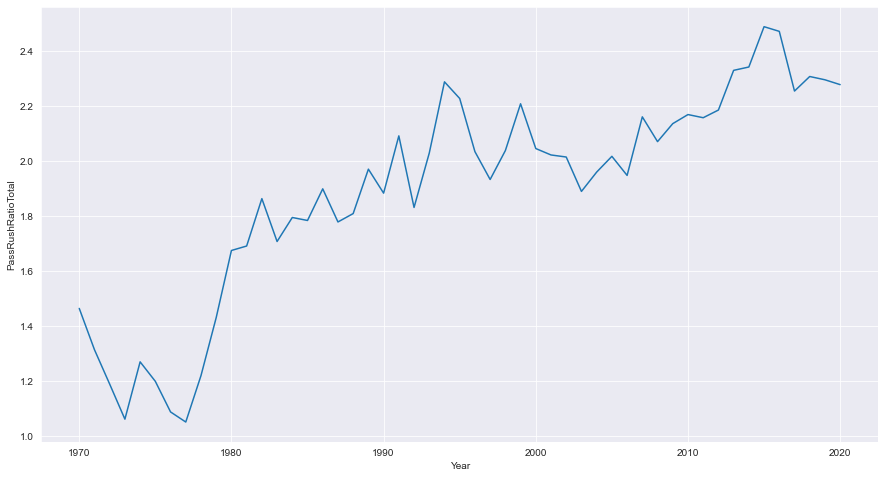

In [13]:
# Line plot of total pass/rush ratio over the years
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Year',y='PassRushRatioTotal', ci=None)

Well it certainly looks like that as teams are throwing more passes (more pass yards) as opposed to rushing, we get a higher total score as well. This is something I will come back to later in my analysis, as I would like to see if this can be statistically proven. 

This brings me though to the process of correlation. I am wondering if any of our stats are highly correlated, while also considering that there will be multicollinearity between columns from which others were created (for example, total score and home score will obvious be highly correlated). There will be many instances of this to be cautious of, but let's just take a quick look if anything different pops out of interest:

<AxesSubplot:>

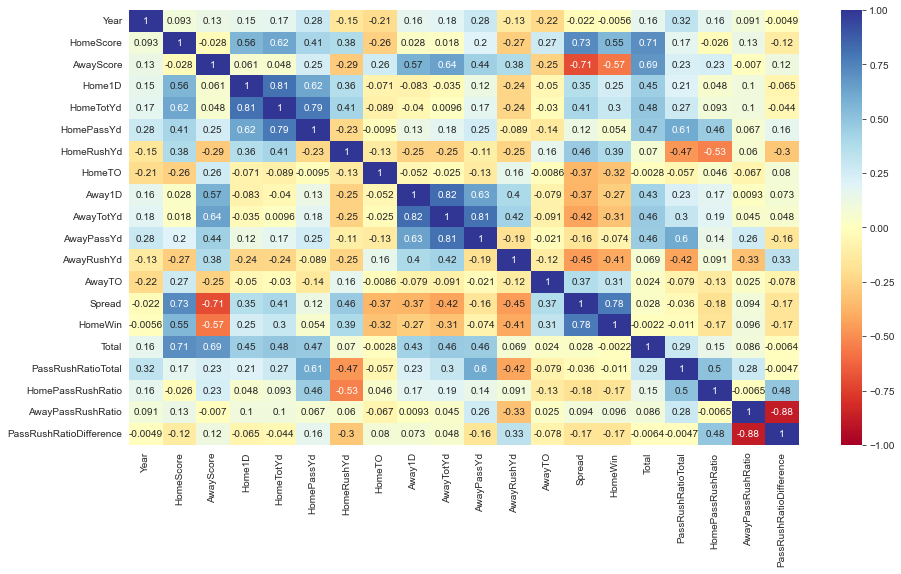

In [14]:
# Plotting a Correlation Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), vmin=-1.0, annot=True, cmap='RdYlBu')

#### Extras

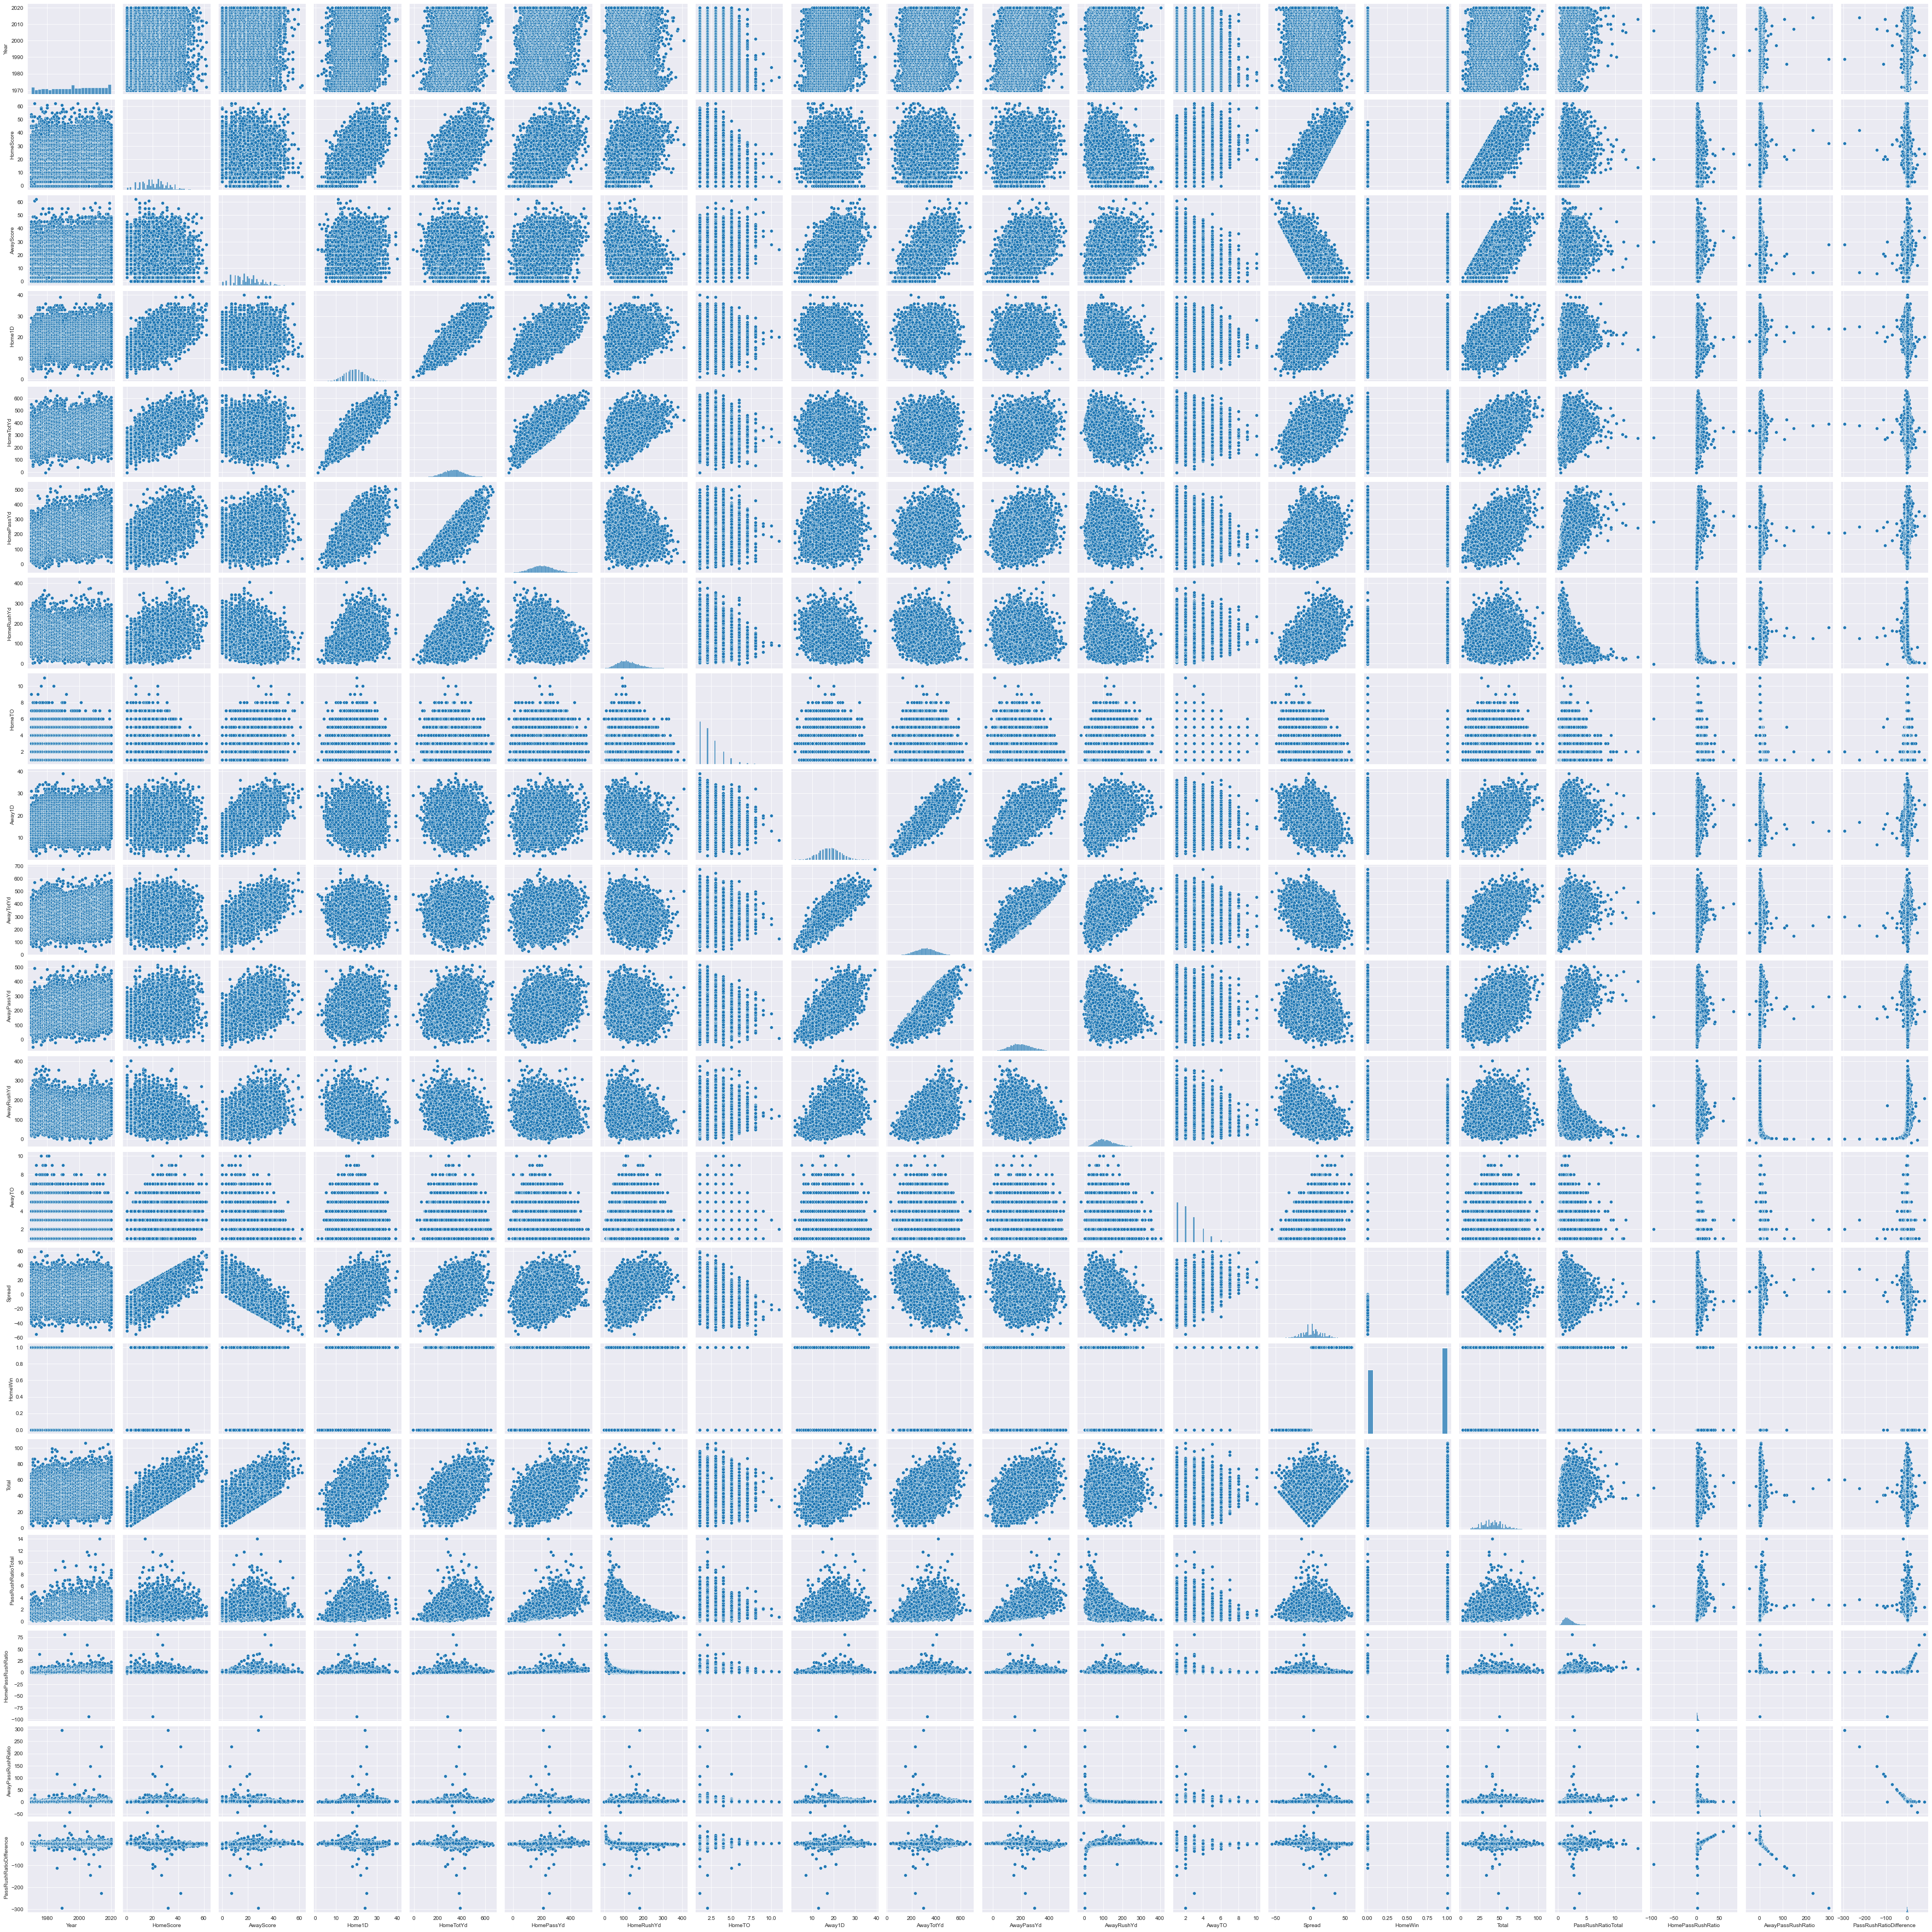

In [15]:
# Want a pair plot of all the different numerical statistics
df_num = df.loc[:,['Spread','HomeTO','AwayTO','HomePassRushRatio','AwayPassRushRatio','PassRushRatioDifference']]
sns.pairplot(df)

<AxesSubplot:>

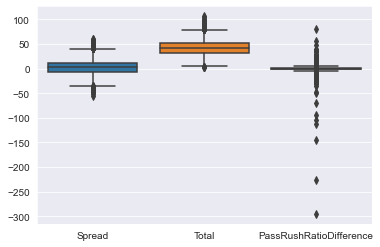

In [97]:
sns.boxplot(data=df[['Spread','Total','PassRushRatioDifference']])

### Exploring the Weather DataFrame (Not used in the analysis - for future considerations)

In [16]:
# Load the Weather DataSet
weather = pd.read_csv('data/NFLML/Weather.csv')
weather.head()

schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
0      9/2/1966             1966             1             False       MIA   
1      9/3/1966             1966             1             False       OTI   
2      9/4/1966             1966             1             False       SDG   
3      9/9/1966             1966             2             False       MIA   
4     9/10/1966             1966             1             False       GNB   

   score_home  score_away team_away team_favorite_id  spread_favorite  \
0       14.00       23.00       RAI              NaN              NaN   
1       45.00        7.00       DEN              NaN              NaN   
2       27.00        7.00       BUF              NaN              NaN   
3       14.00       19.00       NYJ              NaN              NaN   
4       24.00        3.00       CLT              NaN              NaN   

  over_under_line         stadium stadium_neutral  weather_temperature  \
0             NaN     Orange Bowl           False                83.00   
1             NaN    Rice Stadium           False                81.00   
2             NaN  Balboa Stadium           False                70.00   
3             NaN     Orange Bowl           False                82.00   
4             NaN   Lambeau Field           False                64.00   

   weather_wind_mph weather_humidity weather_detail  
0              6.00               71            NaN  
1              7.00               70            NaN  
2              7.00               82            NaN  
3             11.00               78            NaN  
4              8.00               62            NaN

In [17]:
weather.schedule_season.unique()

array([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int64)

In [18]:
# Only care about data from 1970 - 2020 (to match our other data)
weather = weather.loc[weather['schedule_season'] > 1969]
weather = weather.loc[weather['schedule_season'] < 2021]
weather.head()

schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
728     9/18/1970             1970             1             False       RAM   
729     9/19/1970             1970             1             False       NYG   
730     9/20/1970             1970             1             False       NWE   
731     9/20/1970             1970             1             False       BUF   
732     9/20/1970             1970             1             False       CIN   

     score_home  score_away team_away team_favorite_id  spread_favorite  \
728       34.00       13.00       CRD              NaN              NaN   
729       16.00       24.00       CHI              NaN              NaN   
730       27.00       14.00       MIA              NaN              NaN   
731       10.00       25.00       DEN              NaN              NaN   
732       31.00       21.00       RAI              NaN              NaN   

    over_under_line                        stadium stadium_neutral  \
728             NaN  Los Angeles Memorial Coliseum           False   
729             NaN                 Yankee Stadium           False   
730             NaN                Harvard Stadium           False   
731             NaN           War Memorial Stadium           False   
732             NaN                  Cinergy Field           False   

     weather_temperature  weather_wind_mph weather_humidity weather_detail  
728                63.00             10.00               84            NaN  
729                71.00             13.00               70            NaN  
730                66.00             12.00               64            NaN  
731                63.00              7.00               72            NaN  
732                74.00             10.00               58            NaN

In [19]:
df.head()

GameID  Year Week  Day HomeTeam  HomeScore  AwayScore AwayTeam  \
0  197001NORATL  1970   01  Sun      NOR       3.00      14.00      ATL   
1  197001BUFDEN  1970   01  Sun      BUF      10.00      25.00      DEN   
2  197001NYGCHI  1970   01  Sat      NYG      16.00      24.00      CHI   
3  197001CINRAI  1970   01  Sun      CIN      31.00      21.00      RAI   
4  197001CLENYJ  1970   01  Mon      CLE      31.00      21.00      NYJ   

   Home1D  HomeTotYd  HomePassYd  HomeRushYd  HomeTO  Away1D  AwayTotYd  \
0    9.00     235.00      150.00       85.00    2.00   14.00     265.00   
1    8.00     149.00       56.00       93.00    4.00   11.00     282.00   
2   16.00     311.00      253.00       58.00    3.00   18.00     256.00   
3   14.00     364.00      117.00      247.00    1.00   13.00     291.00   
4   20.00     221.00      145.00       76.00     NaN   31.00     454.00   

   AwayPassYd  AwayRushYd  AwayTO  Spread  HomeWin  Total  PassRushRatioTotal  \
0      116.00      149.00    2.00  -11.00        0  17.00                1.14   
1      146.00      136.00    3.00  -15.00        0  35.00                0.88   
2      158.00       98.00    3.00   -8.00        0  40.00                2.63   
3      243.00       48.00    2.00   10.00        1  52.00                1.22   
4      286.00      168.00    4.00   10.00        1  52.00                1.77   

   HomePassRushRatio  AwayPassRushRatio  PassRushRatioDifference  
0               1.76               0.78                     0.99  
1               0.60               1.07                    -0.47  
2               4.36               1.61                     2.75  
3               0.47               5.06                    -4.59  
4               1.91               1.70                     0.21

In [20]:
# Have to change the 'schedule_week' column of weather so it matches that of df
week_map = {'1': '01', '2':'02','3':'03','4':'04','5':'05','6':'06','7':'07','8':'08','9':'09','Wild Card':'WC',
            'Division':'DI','Conf. Champ.':'CC','SuperBowl':'SB', 'Wildcard':'WC','WildCard':'WC','Superbowl':'SB','Conference':'CC'}
weather.schedule_week.replace(week_map, inplace=True)
weather.schedule_week.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', 'DI', 'CC', 'SB', '15', '16', 'WC', '17', '18'],
      dtype=object)

In [21]:
df_merged = pd.merge(left=df, right=weather, left_on=['Year','Week','HomeTeam'], right_on=['schedule_season','schedule_week','team_home'], how='left') #left join the two DataFrames

In [22]:
df_merged.shape

(12262, 42)

In [23]:
weather.shape

(12219, 17)

In [24]:
df_merged.sample(20)

GameID  Year Week  Day HomeTeam  HomeScore  AwayScore AwayTeam  \
2004   1979WCPHICHI  1979   WC  Sun      PHI      27.00      17.00      CHI   
569    197301CHIDAL  1973   01  Sun      CHI      17.00      20.00      DAL   
8914   200809OTIGNB  2008   09  Sun      OTI      19.00      16.00      GNB   
5282   199409WASPHI  1994   09  Sun      WAS      29.00      31.00      PHI   
5071   199312TAMMIN  1993   12  Sun      TAM      23.00      10.00      MIN   
1944   197913CINCRD  1979   13  Sun      CIN      34.00      28.00      CRD   
2846   198401NORATL  1984   01  Sun      NOR      28.00      36.00      ATL   
4642   199114SEAKAN  1991   14  Sun      SEA       6.00      19.00      KAN   
7166   200117PITCLE  2001   17  Sun      PIT      28.00       7.00      CLE   
4189   198914NYJPIT  1989   14  Sun      NYJ       0.00      13.00      PIT   
4366   199011RAMDAL  1990   11  Sun      RAM      21.00      24.00      DAL   
6      197001RAMCRD  1970   01  Fri      RAM      34.00      13.00      CRD   
2980   198410DETPHI  1984   10  Sun      DET      23.00      23.00      PHI   
5437   199503BUFCLT  1995   03  Sun      BUF      20.00      14.00      CLT   
3093   198502SFOATL  1985   02  Sun      SFO      35.00      16.00      ATL   
11836  201908RAMCIN  2019   08  Sun      RAM      24.00      10.00      CIN   
4900   199216CINNWE  1992   16  Sun      CIN      20.00      10.00      NWE   
10493  201407SDGKAN  2014   07  Sun      SDG      20.00      23.00      KAN   
1262   197610CHIGNB  1976   10  Sun      CHI      24.00      13.00      GNB   
1947   197913DALOTI  1979   13  Thu      DAL      24.00      30.00      OTI   

       Home1D  HomeTotYd  HomePassYd  HomeRushYd  HomeTO  Away1D  AwayTotYd  \
2004    18.00     315.00      176.00      139.00    3.00   15.00     241.00   
569     12.00     202.00       30.00      172.00    6.00   17.00     272.00   
8914    20.00     347.00      169.00      178.00     NaN   18.00     390.00   
5282    20.00     349.00      181.00      168.00    3.00   19.00     296.00   
5071    18.00     300.00      200.00      100.00     NaN   12.00     235.00   
1944    20.00     342.00      153.00      189.00     NaN   26.00     480.00   
2846    23.00     268.00      148.00      120.00    4.00   22.00     422.00   
4642    13.00     273.00      226.00       47.00    2.00   21.00     311.00   
7166    19.00     376.00      155.00      221.00    3.00   12.00     173.00   
4189    19.00     313.00      243.00       70.00    3.00   17.00     317.00   
4366    18.00     292.00      124.00      168.00    1.00   17.00     359.00   
6       17.00     342.00      185.00      157.00    1.00   15.00     327.00   
2980    25.00     422.00      258.00      164.00    2.00   18.00     294.00   
5437    17.00     261.00      201.00       60.00    1.00   17.00     296.00   
3093    23.00     380.00      184.00      196.00    1.00   18.00     253.00   
11836   19.00     470.00      372.00       98.00     NaN   24.00     401.00   
4900    21.00     365.00      154.00      211.00     NaN   10.00     176.00   
10493   19.00     251.00      182.00       69.00    1.00   22.00     365.00   
1262    16.00     249.00       47.00      202.00    2.00   16.00     261.00   
1947    20.00     371.00      279.00       92.00    3.00   17.00     378.00   

       AwayPassYd  AwayRushYd  AwayTO  Spread  HomeWin  Total  \
2004       142.00       99.00    3.00   10.00        1  44.00   
569         84.00      188.00    3.00   -3.00        0  37.00   
8914       288.00      102.00    2.00    3.00        1  35.00   
5282       165.00      131.00     NaN   -2.00        0  60.00   
5071       153.00       82.00    2.00   13.00        1  33.00   
1944       317.00      163.00    6.00    6.00        1  62.00   
2846       173.00      249.00    3.00   -8.00        0  64.00   
4642       154.00      157.00     NaN  -13.00        0  25.00   
7166       105.00       68.00    3.00   21.00        1  35.00   
4189       160.00      157.00    1.00  -13.

## Analysis 
In this section I will be using statistics and modelling to answer my questions on the data

### Question 1) Which Statistics Affect the Spread of the Game the most? Do any not?
I will use linear regression to determine which football statistics are the most significant when determining the Spread in Score of a game. I will use a p-value threshold of 0.05 to determine statistically significant columns

In [25]:
regress_df = df.dropna(axis=0)
d_var = regress_df['Spread'] # the target / dependent variable
i_var = regress_df[['Home1D','HomeTotYd','HomePassYd','HomeRushYd','HomeTO','Away1D','AwayTotYd','AwayPassYd','AwayRushYd','AwayTO']] # the independent variables
i_var['Constant'] = np.ones(regress_df.shape[0]) # need a constant value
i_var.head()

C:\Users\bwolk\AppData\Local\Temp\ipykernel_19880\3597428403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_var['Constant'] = np.ones(regress_df.shape[0]) # need a constant value


Home1D  HomeTotYd  HomePassYd  HomeRushYd  HomeTO  Away1D  AwayTotYd  \
0    9.00     235.00      150.00       85.00    2.00   14.00     265.00   
1    8.00     149.00       56.00       93.00    4.00   11.00     282.00   
2   16.00     311.00      253.00       58.00    3.00   18.00     256.00   
3   14.00     364.00      117.00      247.00    1.00   13.00     291.00   
5   15.00     288.00      205.00       83.00    1.00   19.00     303.00   

   AwayPassYd  AwayRushYd  AwayTO  Constant  
0      116.00      149.00    2.00      1.00  
1      146.00      136.00    3.00      1.00  
2      158.00       98.00    3.00      1.00  
3      243.00       48.00    2.00      1.00  
5      202.00      101.00    3.00      1.00

In [26]:
# Perform linear regression to determine important of independent variables
lin_reg = sm.OLS(d_var,i_var)
reg_result = lin_reg.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Spread   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     1834.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:57:43   Log-Likelihood:                -29897.
No. Observations:                8371   AIC:                         5.981e+04
Df Residuals:                    8362   BIC:                         5.988e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Home1D         0.0973      0.033      2.973      0.0

We can see that we have a strong $R^2$ value. This means it is a pretty good predictor. I also notice the f-statistic is very low which means this is statistically significant! Finally our only p-value that is above the threshold is the Away 1st downs. This is strange because the Home1D is significant, even though home and away is technically arbitary when considering the spread. It should also be noted that we have high multicollinearity, which should be attributed to my inclusion of the `HomeTotYd` and `AwayTotYd` columns - they are already represented intrinsically by the Pass and Rush columns. So I will be dropping them. 

Let's first drop the Total Yards from the independent variables

In [27]:
i_var2 = i_var.drop(columns=['HomeTotYd','AwayTotYd'])
lin_reg2 = sm.OLS(d_var,i_var2)
reg_result2 = lin_reg2.fit()
print(reg_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Spread   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     1834.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:57:43   Log-Likelihood:                -29897.
No. Observations:                8371   AIC:                         5.981e+04
Df Residuals:                    8362   BIC:                         5.988e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Home1D         0.0973      0.033      2.973      0.0

Now I am going to drop the Away1D and Home1D columns. I am dropping both because who the home team is arbitary to the spread, so even though the p-value is below the threshold, it wouldn't make sense to drop one without the other. We can also see above that they are not highly correltated.

In [28]:
i_var3 = i_var2.drop(columns=['Home1D','Away1D'])
lin_reg3 = sm.OLS(d_var,i_var3)
reg_result3 = lin_reg3.fit()
print(reg_result3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Spread   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2440.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:57:43   Log-Likelihood:                -29903.
No. Observations:                8371   AIC:                         5.982e+04
Df Residuals:                    8364   BIC:                         5.987e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HomePassYd     0.0538      0.001     42.401      0.0

I am happy with this result, as it appears that a teams Passing Yards, Rushing Yards, and Time Outs are all significant in determining the spread of a game.


### Question 2) Does having more 1st Downs lead to a higher score?
We checked above that it wasn't significant towards the spread of a game. However, I would very curious if the amount of first downs contirbutes to the total score of a team?

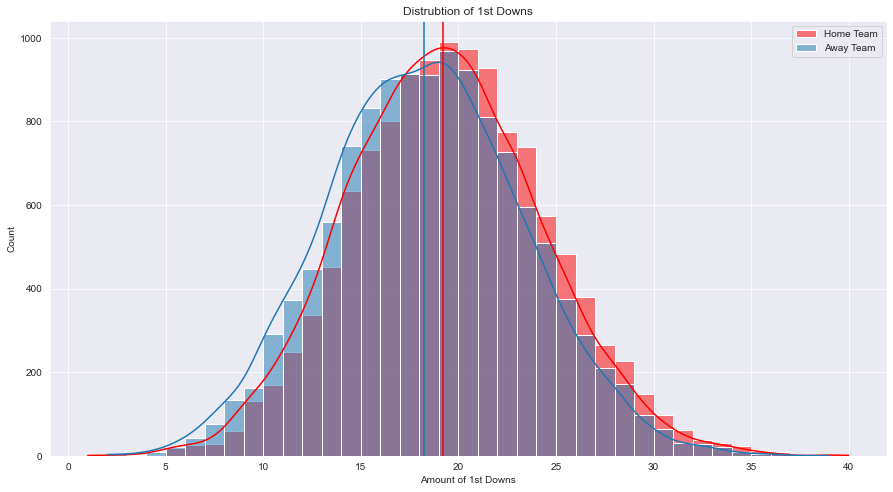

In [48]:
# Begin by looking at home team 1st downs
def plot_1stD(data, title, xlabel, size):
    plt.figure(figsize=size)
    
    #Make a histogram of the amount of 1st Downs for both home and away teams
    ax = sns.histplot(data=data, x='Home1D', binwidth=1, label='Home Team', alpha=0.5, color='red', kde=True) #plotting histogram for home team
    ax1 = sns.histplot(data=data, x='Away1D', binwidth=1, label='Away Team', alpha=0.5, kde=True) #plotting histogram for the away team
    plt.title(title) #sets title
    plt.xlabel(xlabel) #adds label to x-axis
    plt.axvline(data['Home1D'].mean(), color='red') # showing the home 1st down mean
    plt.axvline(data['Away1D'].mean()) #showing the away 1st down mean
    plt.legend() #shows the legend

    
plot_1stD(df,title='Distrubtion of 1st Downs', xlabel='Amount of 1st Downs', size= (15,8))

They are both beautiful normal distributions. This is great because I want to perform a ttest on the Home and Away score to see if you will indeed get a higher score if your team has more 1st downs. My **Hypothesis** will be that if your team has more than the mean amount of 1st downs, then you will statisticall have a higher score!

Because the distrubtion seen above (and at the beginning of my investigation) are both normal, I can confidently perform my analysis on the just the home team score, and come to the same conclusion for the away team.

In [54]:
# Looking at home team first
print(f"The home gains {df['Home1D'].mean()} 1st downs on average, over the past 50 years.")

# Separating the DataFrame into those whose Home 1st down is above or below the mean
df_a = df.loc[df['Home1D'] > df['Home1D'].mean(),'HomeScore'] # above the mean
df_b = df.loc[df['Home1D'] < df['Home1D'].mean(),'AwayScore'] # below the mean

The home gains 19.224206834679062 1st downs on average, over the past 50 years.


For this test, my null-hypothesis would be that the two scores are statistically the same, with the amount of 1st downs having little to no effect on the teams ability to score.

In [57]:
# Perform independent t-test - p-value threshold of 5%
print(f"The mean home score for above average 1st downs: {df_a.mean()}")
print(f"The mean home score for below average 1st downs: {df_b.mean()}")
ttest_ind(df_a,df_b,equal_var=False)

The mean home score for above average 1st downs: 27.209366869037293
The mean home score for below average 1st downs: 19.2184421182266


Ttest_indResult(statistic=45.20465972522096, pvalue=0.0)

We have an incredibly low p-value. Therefore, we can safely reject the null-hypothesis, and conclude that indeed gaining more than the mean amount of 1st downs will statistically improve your ability to score.

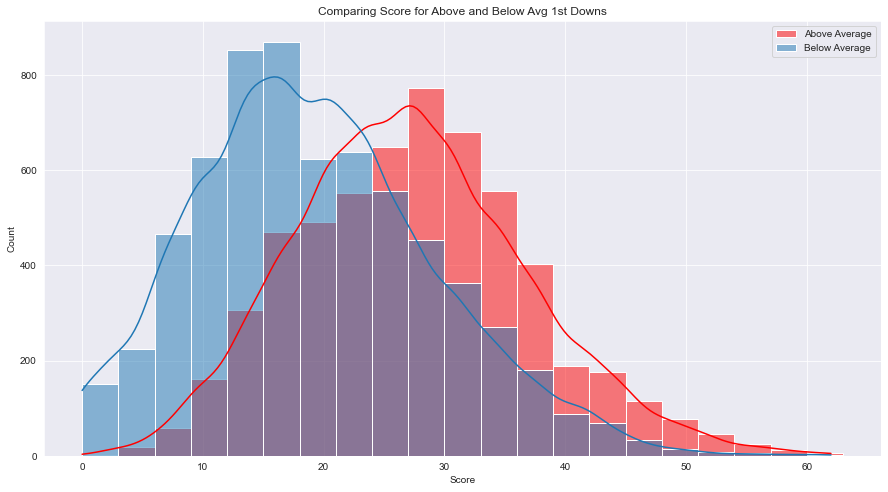

In [74]:
# Quickly plotting this:
def plot1DScore(dfa, dfb, title, xlabel, size):
    plt.figure(figsize=size)
    
    sns.histplot(data=dfa, kde=True, binwidth=3, label= 'Above Average', color='red') # above average
    sns.histplot(data=dfb, kde=True, binwidth=3, label='Below Average') # below average
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend() #show legend
    
plot1DScore(df_a,df_b, title='Comparing Score for Above and Below Avg 1st Downs', xlabel='Score', size=(15,8))

Quickly looking at how many games are played in the above average set vs the below average set

In [80]:
print(f" There were {df_a.count()} games played where there were more than the average amount of 1st Downs.")
print(f" There were {df_b.count()} games played where there were less than the average amount of 1st Downs.")

 There were 5765 games played where there were more than the average amount of 1st Downs.
 There were 6496 games played where there were less than the average amount of 1st Downs.


### Question 3) Which Day of the week has the highest total score? The biggest spread?

In [81]:
# Let's quickly look at the amount of games played on each day of the week.
df['Day'].value_counts()

Sun    10655
Mon      824
Sat      436
Thu      330
Fri       11
Tue        3
Wed        2
Name: Day, dtype: int64

In [115]:
# Group by the day of the week, let's find the mean spread and total
df_day = df.groupby('Day')[['Spread','Total']].mean()
df_day = df_day.rename(columns={'Spread':'Average Spread','Total':'Average Total'}) # renaming the columns for clarity
df_day

Average Spread  Average Total
Day                               
Fri            3.09          50.55
Mon            2.66          42.88
Sat            4.02          42.48
Sun            2.62          41.91
Thu            2.26          43.81
Tue           11.00          49.00
Wed           -1.00          37.00

It's pretty clear that the spreads are all pretty well contained around the 3.0 point spread. This makes sense, as the one of the common ways to score in football is through a field goal, which is worth 3 points. We can ignore the outliers of Tuesday, Wednesday and Friday (as only 16 total games have been played on those days in our dataset). 

Text(0.5, 0, 'Day of Week')

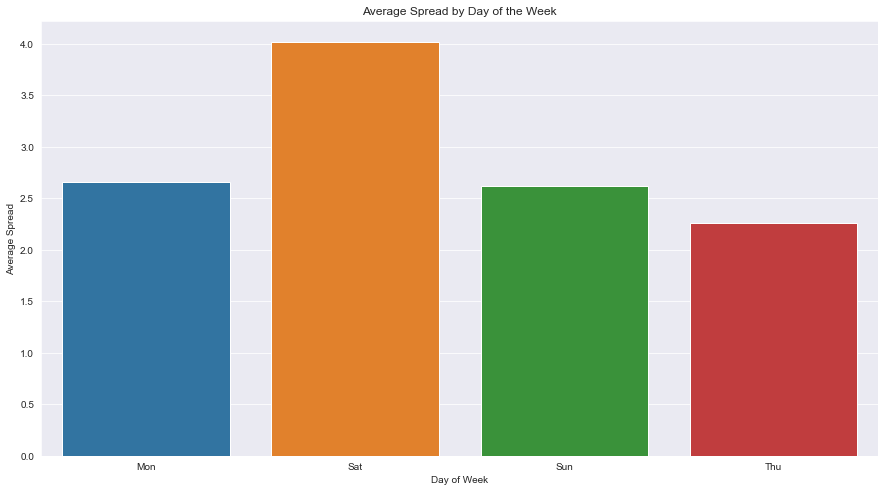

In [116]:
df_day = df_day.iloc[1:5]
plt.figure(figsize=(15,8))
sns.barplot(data=df_day, x=df_day.index, y='Average Spread')
plt.title("Average Spread by Day of the Week")
plt.xlabel("Day of Week")

Text(0.5, 0, 'Day of Week')

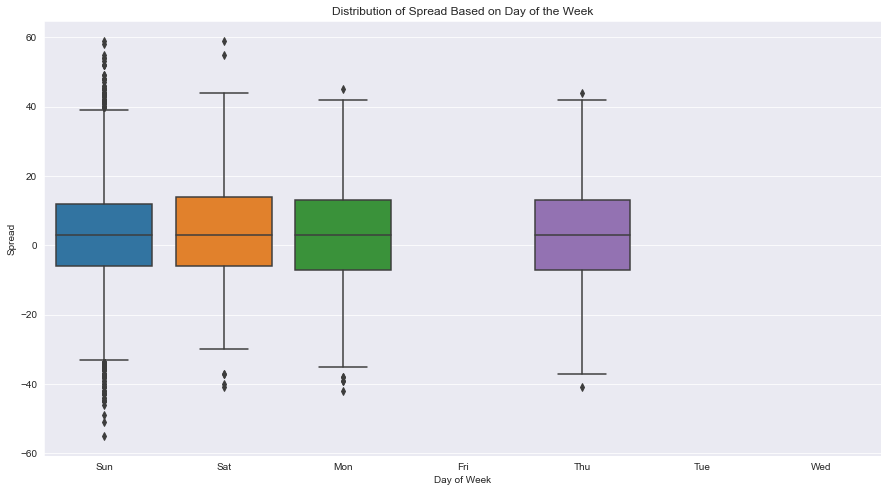

In [124]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[df['Day'].isin(['Mon','Sat','Sun','Thu'])], x=df.Day, y='Spread')
plt.title("Distribution of Spread Based on Day of the Week")
plt.xlabel("Day of Week")

Looking at the distribution of the Spreads by the day of the week. Lots of outliers on the sunday. This is due to the increase in games played on sundays, so there will naturally be more variation.

Text(0.5, 0, 'Day of Week')

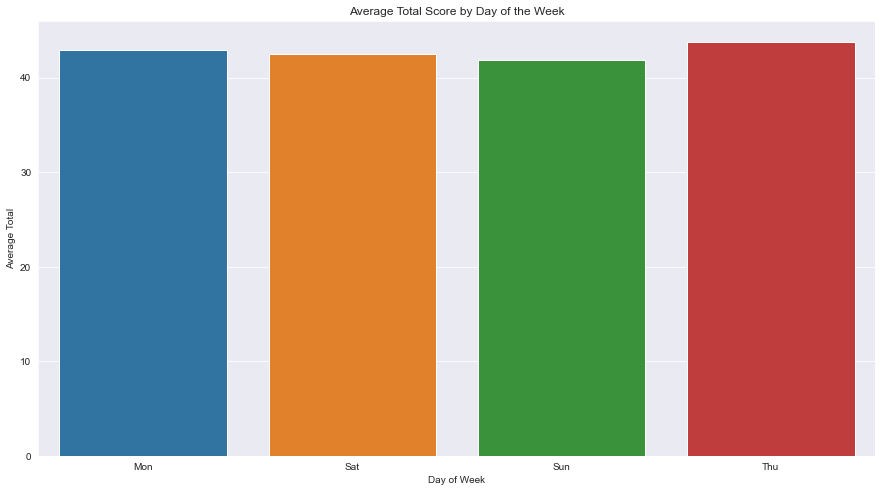

In [117]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_day, x=df_day.index, y='Average Total')
plt.title("Average Total Score by Day of the Week")
plt.xlabel("Day of Week")

Text(0.5, 0, 'Day of Week')

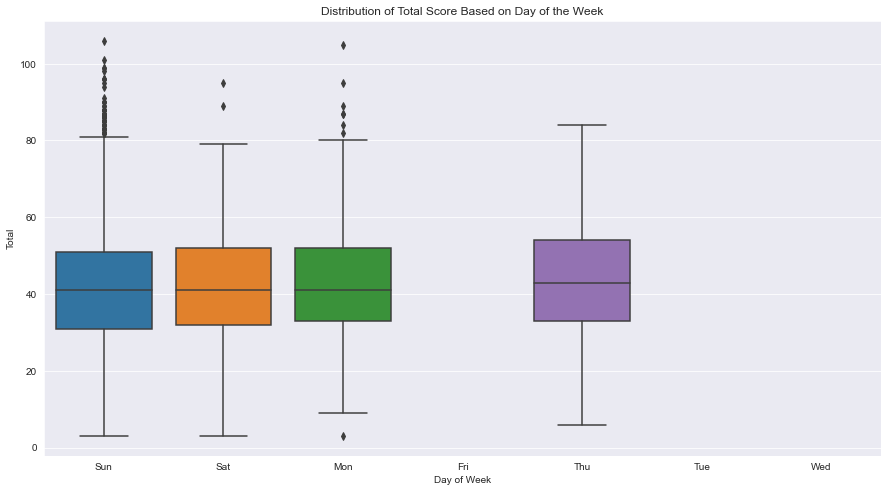

In [130]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[df['Day'].isin(['Mon','Sat','Sun','Thu'])], x=df['Day'], y='Total')
plt.title("Distribution of Total Score Based on Day of the Week")
plt.xlabel("Day of Week")

We can see in the above plots that the average score of games played are all roughly equal independent of the day of the week, with similar distributions (aside from the outliers). 

## Conclusions

In conclusion I was able to closely exmamine the scores of thousands of football games over the past 50 years. By doing so I have determined that the spread of the score between the home and away team is of normal distrubtion, with an average of approximately +2, in favour of the home team. Using this information, I was curious to set out to determine if the other available stats could be used to determine the spread of the game. It was discovered that they were all statistically viable, aside from the amount of 1st downs for the teams. That being said, I would in the future like toexamine if the difference in 1st downs would actually have an effect on the spread of the game. 

To further examine this though, I wanted to test if the amount of first downs actually does affect a teams ability to score. After first determining that the distrubtion of the amount of 1st downs attained for a team was normally distirubted for both the home and away teams, I was able to statisically prove that 1st downs attained does affect a teams score through the use of an A/B (or T) Test. I split the data based upon whether a team that got more or less than the average amount of 1st downs. I then proved that those teams who got more than the average amount of 1st downs, did in fact score more points.

Finally I examine if there was a day of the week that had a significant difference in the average spread or total score. I can safely conclude that no, the day of the week does not seem to have any affiliation with the score. This could though be investigated with a deeper dive into a statistical analysis, but this was not done yet due to time constraints. I will also note that Saturday does appear to have the largest spread at ~4.0, but it really isn't as significant as it looks on the plot. It is only about 1.5 points more. 

### Future Considerations:
In the future I would like to dive deeper into what makes a team win. To do this however I would need a more inclusive and larger dataset. Some stats I would be interested in is:
* number of pass attempts
* number of pass completions
* number of rush attempts
* number of rush completions
* number of extra points / 2-pt conversions
* 4th down conversions
* How points were scored (touchdowns, field goals, etc.)
* Defensive Stats (sacks, interceptions


With this data (and more) I'd be able to answer much more interesting questions, such as how has the game changed over time - do we see more kicking, more 4th-down attempts, more pass attempts? Football is a sport that is dominated by statistics, and people dedicate their lives to it, so I'd love to see if I could draw similar or differing conclusions if I had access to the same data. 

There was also some data that I already have that I would like to use to continue my investigation. I know I didn't use the difference in pass rush ratio, and that is a potentially interesting statistic that I would be interested to know how it affects the outcome of the game. I have also not gotten around to determining if the ratio of pass yards to rush yards increasing over the years does statistically increase the total score of games over the years. I feel that the absolute amount of rushes and passes would be critical to this investigation. 

Furthermore, you can see in one area that I was begginning to explore how the weather affects the outcome of games. I will update this file with an analysis on that (in particular the wind) very shortly in the future.